In [16]:
# Import all necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Get the response from the Census API
key = '1a3f83be0b86cf8c738d2833cd8a386aee5b3c5c'
url = f'https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_U,FACTORS_U_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F,TECHUSE_LABEL&for=us:*&key={key}'
response_tcb = requests.get(url)

In [21]:
# Confirm that response is valid
print(response_tcb.status_code)

200


In [22]:
# Load response data into pandas DataFrame
json = response_tcb.json()
df_tcb = pd.DataFrame(json[1:], columns=json[0])

In [23]:
# Get some basic details about our DataFrame
print(df_tcb.shape)
print(df_tcb.info())
print(df_tcb.head())
print(tcb.tail())

(5500, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO_ID             5500 non-null   object
 1   NAME               5500 non-null   object
 2   NAICS2017          5500 non-null   object
 3   NAICS2017_LABEL    5500 non-null   object
 4   SEX                5500 non-null   object
 5   SEX_LABEL          5500 non-null   object
 6   ETH_GROUP          5500 non-null   object
 7   ETH_GROUP_LABEL    5500 non-null   object
 8   RACE_GROUP         5500 non-null   object
 9   RACE_GROUP_LABEL   5500 non-null   object
 10  VET_GROUP          5500 non-null   object
 11  VET_GROUP_LABEL    5500 non-null   object
 12  NSFSZFI            5500 non-null   object
 13  NSFSZFI_LABEL      5500 non-null   object
 14  FACTORS_U          5500 non-null   object
 15  FACTORS_U_LABEL    5500 non-null   object
 16  YEAR               5500 non-nul

In [24]:
# We don't actually want all of this data, just the more readable columns, so we filter the columns
tcb = df_tcb[['GEO_ID','NAME','NAICS2017_LABEL','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','NSFSZFI_LABEL','FACTORS_U','FACTORS_U_LABEL','TECHUSE_LABEL','FIRMPDEMP','RCPPDEMP','EMP','PAYANN']]

In [25]:
# Those same details, now on our filtered data
print(df_tcb.shape)
print(df_tcb.info())
print(df_tcb.head())
print(tcb.tail())

(5500, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEO_ID             5500 non-null   object
 1   NAME               5500 non-null   object
 2   NAICS2017          5500 non-null   object
 3   NAICS2017_LABEL    5500 non-null   object
 4   SEX                5500 non-null   object
 5   SEX_LABEL          5500 non-null   object
 6   ETH_GROUP          5500 non-null   object
 7   ETH_GROUP_LABEL    5500 non-null   object
 8   RACE_GROUP         5500 non-null   object
 9   RACE_GROUP_LABEL   5500 non-null   object
 10  VET_GROUP          5500 non-null   object
 11  VET_GROUP_LABEL    5500 non-null   object
 12  NSFSZFI            5500 non-null   object
 13  NSFSZFI_LABEL      5500 non-null   object
 14  FACTORS_U          5500 non-null   object
 15  FACTORS_U_LABEL    5500 non-null   object
 16  YEAR               5500 non-nul

In [26]:
# Convert columns to numeric types, so we can do math with them!
tcb = tcb.astype({'FIRMPDEMP':int, 'RCPPDEMP':'int64', 'PAYANN':'int64'})

# This is where we filter the responses we want to look at
# Filtering by owner's sex
data = tcb.loc[tcb['SEX_LABEL'] == 'Total']
# Filtering by owner's ethnicity
data = data.loc[data['ETH_GROUP_LABEL'] == 'Total']
# Filtering by owner's race
data = data.loc[data['RACE_GROUP_LABEL'] == 'Total']
# Filtering by owner's veteran status
data = data.loc[data['VET_GROUP_LABEL'] == 'Total']
# Filtering by business size 
data = data.loc[data['NSFSZFI_LABEL'] == 'All firms']
# Filtering by business type
data = data.loc[data['NAICS2017_LABEL'] == 'Total for all sectors']
# Filter by question response
data = data[~data['FACTORS_U_LABEL'].str.contains("Total Reporting")]
#data = data[~data['FACTORS_U_LABEL'].str.contains("not applicable")]
#data = data[~data['FACTORS_U_LABEL'].str.contains("No factors")]

# Filtering out specific response sets into their own datasets
robo_data = data[data['FACTORS_U_LABEL'].str.contains("Robotics")]
ai_data = data[data['FACTORS_U_LABEL'].str.contains("Artificial Intelligence")]
cloud_data = data[data['FACTORS_U_LABEL'].str.contains("Cloud-Based")]
exp_data = data[data['FACTORS_U_LABEL'].str.contains("too expensive")]

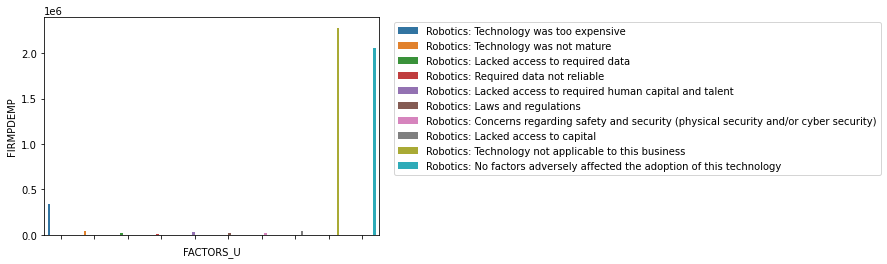

In [28]:
# Creating a bar graph of robotics data
robotics = sns.barplot(x="FACTORS_U", y="FIRMPDEMP", hue="FACTORS_U_LABEL", data=robo_data)
robotics.set(xticklabels=[])
robotics.legend(bbox_to_anchor=(1.03, 1))

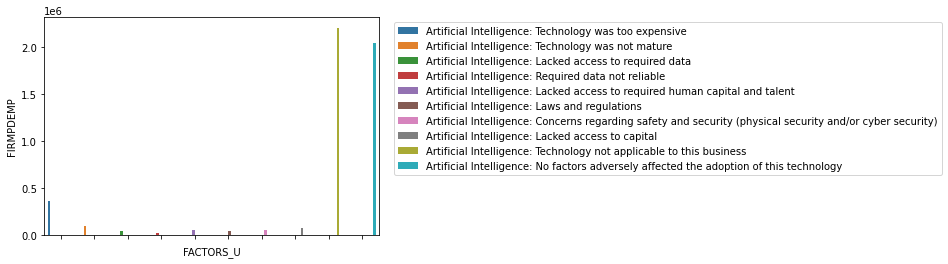

In [30]:
# Creating a bar graph of artificial intelligence data
ai = sns.barplot(x="FACTORS_U", y="FIRMPDEMP", hue="FACTORS_U_LABEL", data=ai_data)
ai.set(xticklabels=[])
ai.legend(bbox_to_anchor= (1.03, 1))

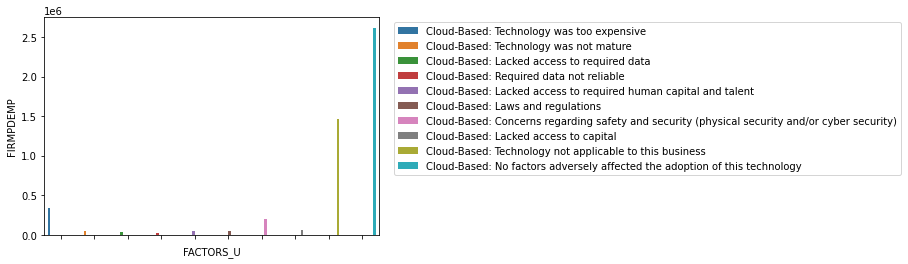

In [31]:
# Creating a bar graph of cloud-based data
cloud = sns.barplot(x="FACTORS_U", y="FIRMPDEMP", hue="FACTORS_U_LABEL", data=cloud_data)
cloud.set(xticklabels=[])
cloud.legend(bbox_to_anchor=(1.03, 1))

In [32]:
# Computing columns for average pay and average revenue
exp_data = exp_data.copy()
exp_data["AVG_REV"] = exp_data["RCPPDEMP"] / exp_data["FIRMPDEMP"]
exp_data["AVG_PAY"] = exp_data["PAYANN"] / exp_data["FIRMPDEMP"]

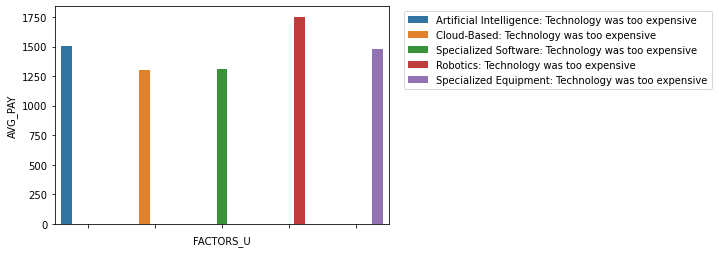

In [34]:
# Creating a bar graph of expense-based data
exp = sns.barplot(x="FACTORS_U", y="AVG_PAY", hue="FACTORS_U_LABEL", data=exp_data)
exp.set(xticklabels=[])
exp.legend(bbox_to_anchor=(1.03, 1))

In [ ]:
### LINSEYS NOTEBOOK

In [ ]:
company_summary_base_url = 'https://api.census.gov/data/2018/abscs'
business_char_base_url = 'https://api.census.gov/data/2018/abscb'
owner_char_base_url = 'https://api.census.gov/data/2018/abscbo'
tech_char_base_url = 'https://api.census.gov/data/2018/abstcb'
api_key = 'key=54fdac0557ae012c182506724253e238427a8b27'
state = 'for=state:*'
country = 'for=us:*'
metro = 'for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*'

In [ ]:
# Company summary to dataframe
variables = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,RCPSZFI,YIBSZFI'

# country, state, or metro options
region = f'get={variables}&{country}'
response = requests.get(f'{company_summary_base_url}?{region}&{api_key}')
comp_summary_text = response.json()
comp_summary_df = pd.DataFrame(comp_summary_text[1:], columns=comp_summary_text[0])
comp_summary_df = comp_summary_df[(comp_summary_df['NAICS2017_LABEL']=='Professional, scientific, and technical services')]

comp_summary_df.head()

In [ ]:
# Business Characteristics to dataframe
variables = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F,EMPSZFI'

# country, state, or metro options
region = f'get={variables}&{country}'
response = requests.get(f'{business_char_base_url}?{region}&{api_key}')
business_char_text = response.json()
business_char_df = pd.DataFrame(business_char_text[1:],columns=business_char_text[0])
business_char_df = business_char_df[(business_char_df['NAICS2017_LABEL']=='Professional, scientific, and technical services')]
business_char_df.tail()

In [ ]:
# Tech Characteristics to dataframe
variables = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,VET_GROUP,VET_GROUP_LABEL,NSFSZFI,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F,IMPACTWK_U'

# country, state, or metro options
region = f'get={variables}&{country}'
response = requests.get(f'{tech_char_base_url}?{region}&{api_key}')
tech_char_text = response.json()
tech_char_df = pd.DataFrame(tech_char_text[1:], columns=tech_char_text[0])
tech_char_df = tech_char_df[(tech_char_df['NAICS2017_LABEL']=='Professional, scientific, and technical services')]

tech_char_df.tail()

In [ ]:
# Owner Characteristics to dataframe
variables = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F'

# country, state, or metro options
region = f'get={variables}&{country}'
response = requests.get(f'{owner_char_base_url}?{region}&{api_key}')
owner_char_text = response.json()
owner_char_df = pd.DataFrame(owner_char_text[1:], columns=owner_char_text[0])
owner_char_df = owner_char_df[(owner_char_df['NAICS2017_LABEL']=='Professional, scientific, and technical services')]
owner_char_df.head()

In [ ]:
for column in comp_summary_df:
    print(column, comp_summary_df[column].unique())

In [ ]:
technical_fields_owners_df = owner_char_df[['OWNCHAR_LABEL', 'OWNER_VET_LABEL', 'QDESC_LABEL','OWNER_RACE_LABEL', 'OWNER_ETH_LABEL', 'OWNER_SEX_LABEL','NAICS2017_LABEL', 'OWNPDEMP', 'OWNPDEMP_F', 'OWNPDEMP_PCT','OWNPDEMP_S','OWNPDEMP_PCT_S']]

technical_fields_owners_df.head()

In [ ]:
technical_fields_owners_df['OWNPDEMP'] = technical_fields_owners_df['OWNPDEMP'].astype(int)
technical_fields_owners_min_df = technical_fields_owners_df.copy()

technical_fields_owners_min_df.drop(technical_fields_owners_min_df.index[technical_fields_owners_min_df['OWNER_RACE_LABEL'] == 'American Indian and Alaska Native'], inplace=True)
technical_fields_owners_min_df.drop(technical_fields_owners_min_df.index[technical_fields_owners_min_df['OWNER_RACE_LABEL'] == 'White'], inplace=True)
technical_fields_owners_min_df.drop(technical_fields_owners_min_df.index[technical_fields_owners_min_df['OWNER_RACE_LABEL'] == 'Black or African American'], inplace=True)
technical_fields_owners_min_df.drop(technical_fields_owners_min_df.index[technical_fields_owners_min_df['OWNER_RACE_LABEL'] == 'Asian'], inplace=True)
technical_fields_owners_min_df.drop(technical_fields_owners_min_df.index[technical_fields_owners_min_df['OWNER_RACE_LABEL'] == 'Native Hawaiian and Other Pacific Islander'], inplace=True)
technical_fields_owners_min_df.drop(technical_fields_owners_min_df.index[technical_fields_owners_min_df['OWNER_RACE_LABEL'] == 'All owners of respondent firms'], inplace=True)
technical_fields_owners_min_df.drop(technical_fields_owners_min_df.index[technical_fields_owners_min_df['OWNER_SEX_LABEL'] == 'All owners of respondent firms'], inplace=True)

fig = px.histogram(technical_fields_owners_min_df, color='OWNER_SEX_LABEL', x='OWNER_RACE_LABEL', barmode='group', y='OWNPDEMP', title='Count of Owners of Firms With Technical Classification by Minority Status and Gender', labels={'OWNER_SEX_LABEL':'Gender', 'OWNPDEMP': 'owners of respondent employer firms', 'OWNER_RACE_LABEL':'Minority Status'}, color_discrete_map={'Male': 'blue','Female': 'red'})
fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 1000)
fig.show()

In [ ]:
technical_fields_owners_races_df = technical_fields_owners_df.copy()
technical_fields_owners_races_df.drop(technical_fields_owners_races_df.index[technical_fields_owners_races_df['OWNER_RACE_LABEL'] == 'All owners of respondent firms'], inplace=True)
technical_fields_owners_races_df.drop(technical_fields_owners_races_df.index[technical_fields_owners_races_df['OWNER_RACE_LABEL'] == 'Minority'], inplace=True)
technical_fields_owners_races_df.drop(technical_fields_owners_races_df.index[technical_fields_owners_races_df['OWNER_RACE_LABEL'] == 'Nonminority'], inplace=True)
technical_fields_owners_races_df.drop(technical_fields_owners_races_df.index[technical_fields_owners_races_df['OWNER_SEX_LABEL'] == 'All owners of respondent firms'], inplace=True)

fig = px.histogram(technical_fields_owners_races_df, color='OWNER_SEX_LABEL', x='OWNER_RACE_LABEL', barmode='group', y='OWNPDEMP', title='Count of Owners of Firms With Technical Classification by Race and Gender', labels={'OWNER_SEX_LABEL':'Gender', 'OWNPDEMP': 'owners of respondent employer firms', 'OWNER_RACE_LABEL':'Race of Owner'}, color_discrete_map={'Male': 'blue','Female': 'red'})
fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 1000)
fig.show()

In [ ]:
# drop unnecessary values
comp_summary_tech_df = comp_summary_df.copy()
comp_summary_tech_df.drop(comp_summary_tech_df.index[comp_summary_tech_df['RACE_GROUP_LABEL'] == 'Total'], inplace=True)
comp_summary_tech_df.drop(comp_summary_tech_df.index[comp_summary_tech_df['RACE_GROUP_LABEL'] == 'Classifiable'], inplace=True)
comp_summary_tech_df.drop(comp_summary_tech_df.index[comp_summary_tech_df['RACE_GROUP_LABEL'] == 'Unclassifiable'], inplace=True)
comp_summary_tech_df.drop(comp_summary_tech_df.index[comp_summary_tech_df['RACE_GROUP_LABEL'] == 'Minority'], inplace=True)
comp_summary_tech_df.drop(comp_summary_tech_df.index[comp_summary_tech_df['RACE_GROUP_LABEL'] == 'Nonminority'], inplace=True)
comp_summary_tech_df.drop(comp_summary_tech_df.index[comp_summary_tech_df['RACE_GROUP_LABEL'] == 'Equally minority/nonminority'], inplace=True)

comp_summary_tech_df.drop(comp_summary_tech_df.index[comp_summary_tech_df['SEX_LABEL'] == 'Total'], inplace=True)
comp_summary_tech_df.drop(comp_summary_tech_df.index[comp_summary_tech_df['SEX_LABEL'] == 'Equally male/female'], inplace=True)

In [ ]:
comp_summary_tech_df['EMP'] = comp_summary_tech_df['EMP'].astype(int)

fig = px.histogram(comp_summary_tech_df, color='SEX_LABEL', x='RACE_GROUP_LABEL', y='EMP', barmode='group', title='Count of Tech Employees by Race and Gender', labels={'SEX_LABEL':'Gender', 'RACE_GROUP_LABEL':'Race Group', 'EMP':'Employees'}, color_discrete_map={'Male': 'blue','Female': 'red'})
fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width = 1000)
fig.show()

In [ ]:
ints_tech_char_df = tech_char_df[['FIRMPDEMP', 'EMP', 'PAYANN']]
ints_tech_char_df['PAYANN'] = ints_tech_char_df['PAYANN'].astype(int)
ints_tech_char_df['EMP'] = ints_tech_char_df['EMP'].astype(int)
ints_tech_char_df['FIRMPDEMP'] = ints_tech_char_df['FIRMPDEMP'].astype(int)
fig = px.scatter_matrix(ints_tech_char_df, title='Scatter Matrix of Number Firms, Employees, and Annual Pay', labels={'FIRMPDEMP':'Number of Employer Firms', 'PAYANN':'Annual Payroll ($1000)', 'EMP':'Number of Employees'})
fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width=1000,
    height=800,
    )
fig.show()

In [ ]:
ints_tech_char_df = tech_char_df[['FIRMPDEMP', 'EMP', 'PAYANN']]
ints_tech_char_df['PAYANN'] = ints_tech_char_df['PAYANN'].astype(int)
ints_tech_char_df['EMP'] = ints_tech_char_df['EMP'].astype(int)
ints_tech_char_df['FIRMPDEMP'] = ints_tech_char_df['FIRMPDEMP'].astype(int)
fig = px.scatter_matrix(ints_tech_char_df, title='Scatter Matrix of Number Firms, Employees, and Annual Pay', labels={'FIRMPDEMP':'Number of Employer Firms', 'PAYANN':'Annual Payroll ($1000)', 'EMP':'Number of Employees'})
fig.update_layout(
    title={        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    width=1000,
    height=800,
    )
fig.show()

In [ ]:
### NICKS NOTEBOOK

In [ ]:
comp_sum3 = requests.get("https://api.census.gov/data/2018/abscs?get=NAME,PAYANN,SEX&for=state:*&NAICS2017=00&key=YOURKEYHERE")

In [ ]:
comp_sum3json = comp_sum3.json()

In [ ]:
company_payroll_by_sex = pd.DataFrame(comp_sum3json[1:], columns=comp_sum3json[0])

In [ ]:
company_payroll_by_sex['SEX']=company_payroll_by_sex['SEX'].astype(int)

company_payroll_by_sex['PAYANN']=company_payroll_by_sex['PAYANN'].astype(int)

In [ ]:
cpbs_no_tot=company_payroll_by_sex.loc[company_payroll_by_sex['SEX']!=1]

In [ ]:
cpbs_no_tot["SEX"].replace([2,3,4],["Female","Male","Equally Male/Female"], inplace=True)

In [ ]:

figure3=px.bar(cpbs_no_tot,
    y="PAYANN",
    x="NAME",
    color="SEX",
    title="Business Payroll By Sex",
    labels={"PAYANN": "Annual Pay", "NAME": "States"},
    width= 1600,
    height=800)

figure3.show()

In [ ]:
comp_sum4 = requests.get("https://api.census.gov/data/2018/abscs?get=NAME,RACE_GROUP,RACE_GROUP_LABEL,PAYANN&for=state:*&NAICS2017=00&key=YOURKEYHERE")

In [ ]:
ownerracejson=comp_sum4.json()

In [ ]:
ownerracedf=pd.DataFrame(ownerracejson[1:],columns=ownerracejson[0])

In [ ]:
ownerracedf["PAYANN"] = ownerracedf["PAYANN"].astype(int)

In [ ]:
ownerracedf["RACE_GROUP_LABEL"] = ownerracedf["RACE_GROUP_LABEL"].astype(str)

In [ ]:
ornototdf=ownerracedf.loc[ownerracedf["RACE_GROUP_LABEL"]!='Total']

In [ ]:
#here I notice that there are non-minority/minority distinctions mixed with actual race discriptions so I break them up

ornototdf.head(50)

In [ ]:
ornototdf2=ornototdf.loc[ornototdf["RACE_GROUP_LABEL"]!='Minority']

ornototdf2=ornototdf2.loc[ornototdf2["RACE_GROUP_LABEL"]!='Nonminority']

ornototdf2=ornototdf2.loc[ornototdf2["RACE_GROUP_LABEL"]!='Equally minority/nonminority']

In [ ]:
figure5=px.bar(ornototdf2,
    y="PAYANN",
    x="NAME",
    color="RACE_GROUP_LABEL",
    title="Business Payroll By Race",
    labels={"PAYANN": "Annual Pay","NAME": "States"},
    width= 1600,
    height=800)

figure5.show()

In [ ]:
ornototdf3=ornototdf.loc[ornototdf["RACE_GROUP_LABEL"]!='White']

ornototdf3=ornototdf3.loc[ornototdf3["RACE_GROUP_LABEL"]!='Asian']

ornototdf3=ornototdf3.loc[ornototdf3["RACE_GROUP_LABEL"]!='Native Hawaiian and Other Pacific Islander']

ornototdf3=ornototdf3.loc[ornototdf3["RACE_GROUP_LABEL"]!='American Indian and Alaska Native']

ornototdf3=ornototdf3.loc[ornototdf3["RACE_GROUP_LABEL"]!='Black or African American']

In [ ]:
figure6=px.bar(ornototdf3,
    y="PAYANN",
    x="NAME",
    color="RACE_GROUP_LABEL",
    title="Business Payroll By Race",
    labels= {"PAYANN": "Annual Pay", "NAME": "States"},
    width= 1600,
    height=800)

figure6.show()